# Audio Signal Representations

This notebook demonstrates fundamental representations and transformations for audio signals using Python. It covers time domain, frequency domain, time-frequency (spectrogram), and wavelet analysis. Each section includes explanations and visualizations to help you understand the concepts and their practical applications.

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Requirements
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import stft
from pywt import wavedec
import IPython.display as ipd
from dsp.utils.paths import signals_audio_dir

sns.set_style("whitegrid")

## Load Audio Signal
We load a sample audio file and listen to it.

In [12]:
# Load audio file and listen to it
signal_path = signals_audio_dir("ja_female.wav")
fs, x = wavfile.read(signal_path)
dt = 1/fs

# Listen to the audio
ipd.Audio(x, rate=fs)

## Time Domain Representation (Waveform)
The time domain representation shows how the amplitude of the signal varies over time.

Sampling frequency (Hz): 48000
Signal length (samples): 19200


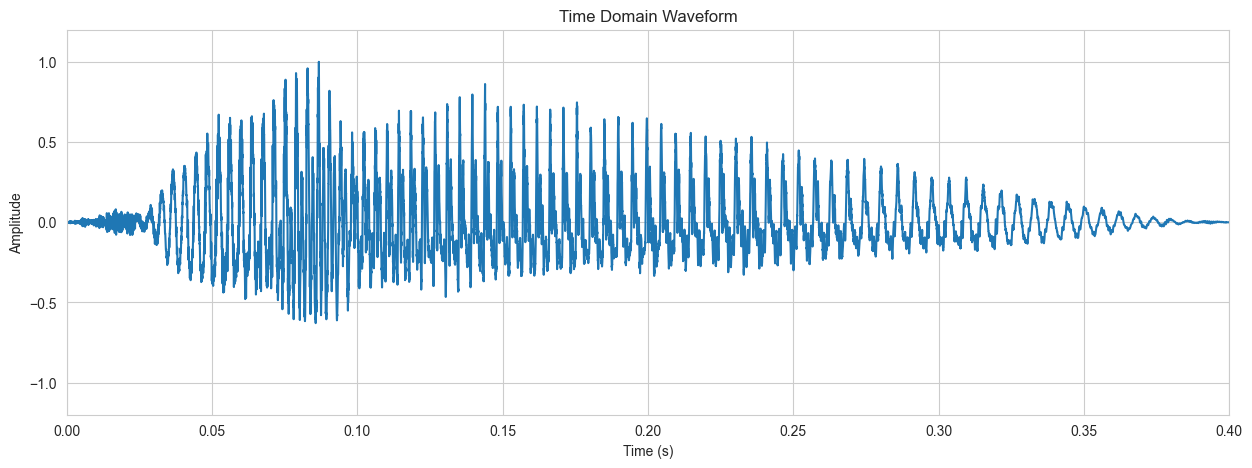

In [13]:
# Normalize and create time axis
x = x / np.max(np.abs(x), axis=0)
nx = len(x)
t = np.linspace(0, nx*dt, nx)

print(f"Sampling frequency (Hz): {fs}")
print(f"Signal length (samples): {nx}")

plt.figure(figsize=(15, 5))
plt.plot(t, x)
plt.ylim((-1.2, 1.2))
plt.xlim((0, nx*dt))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Waveform')
plt.show()

### Select a Segment for Analysis
Often, we analyze a segment of the signal to focus on a particular event or reduce computational load.

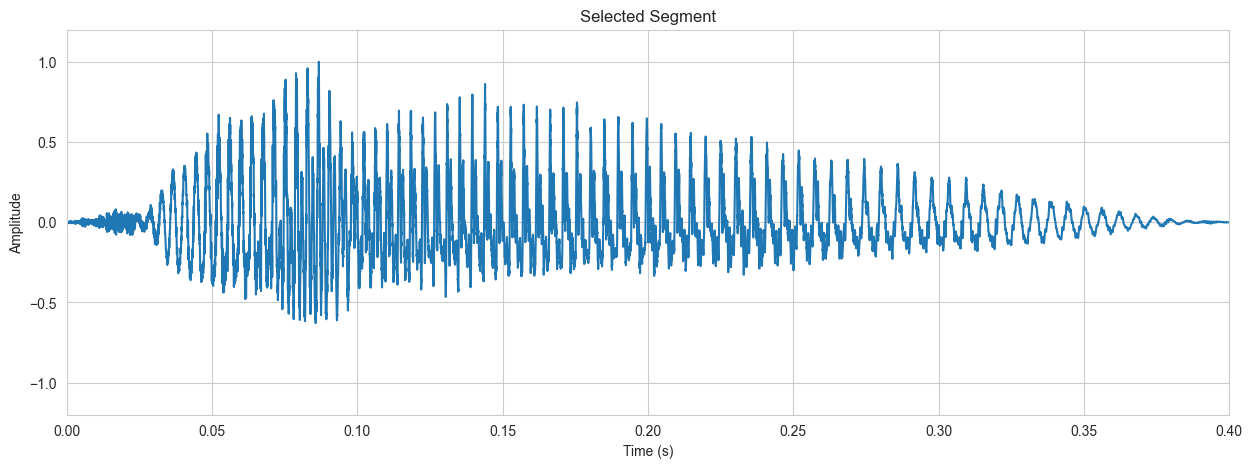

In [14]:
# Select a segment (buffer)
t0 = 0
t1 = 0.4
xi = x[int(t0*fs):int(t1*fs)]
ti = t[int(t0*fs):int(t1*fs)]

plt.figure(figsize=(15, 5))
plt.plot(ti, xi)
plt.ylim((-1.2, 1.2))
plt.xlim((t0, t1))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Selected Segment')
plt.show()

# Listen to the segment
ipd.Audio(xi, rate=fs)

## Frequency Domain Representation (Power Spectrum)
The frequency domain representation reveals the spectral content of the signal using the Fast Fourier Transform (FFT).

Number of frequency bins: 19200
Bin width (Hz): 2.5


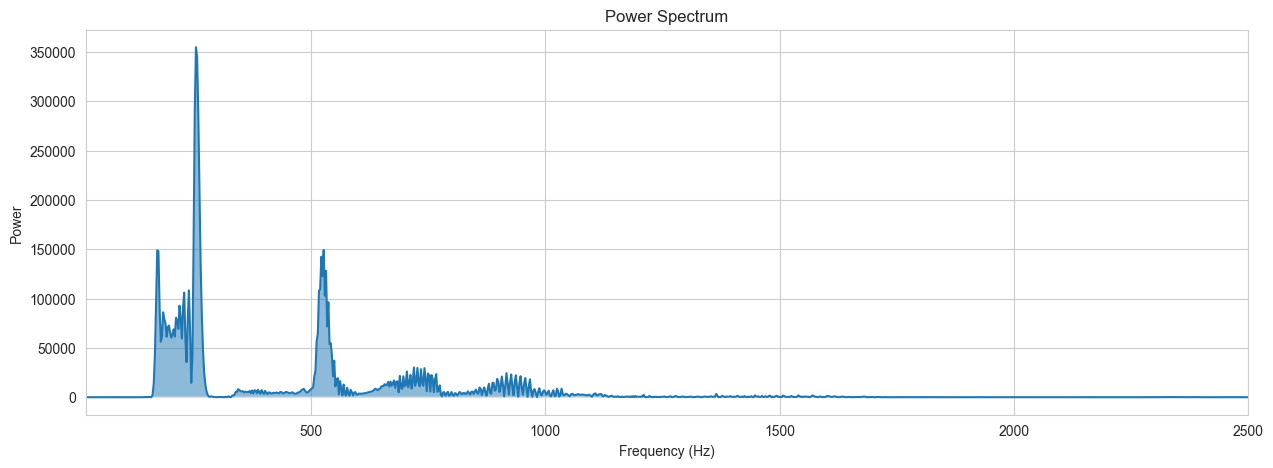

In [15]:
# Compute and plot power spectrum
nfft = len(xi)
f = np.linspace(0, fs, nfft)
X = fft(xi, nfft)
PSD = np.abs(X)**2

print(f"Number of frequency bins: {nfft}")
print(f"Bin width (Hz): {fs/nfft}")

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(f, PSD)
ax.fill_between(f, PSD, alpha=0.5)
ax.set_xlim((20, 2500))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.set_title('Power Spectrum')
plt.show()

## Time-Frequency Representation (Spectrogram)
The spectrogram shows how the frequency content of the signal evolves over time using the Short-Time Fourier Transform (STFT).

In [ ]:
M = 2048  # Length of each segment
poverlap = 0.95  # Percentage of overlap
noverlap = int(np.ceil((M - (M % 2))*poverlap))

freq, time, STFT = stft(
    xi,
    fs,
    window='hann',
    nperseg=M,
    noverlap=noverlap,
    nfft=nfft,
)

STFTdB = 20*np.log10(np.abs(STFT))
STFTdB = STFTdB-np.max(STFTdB)

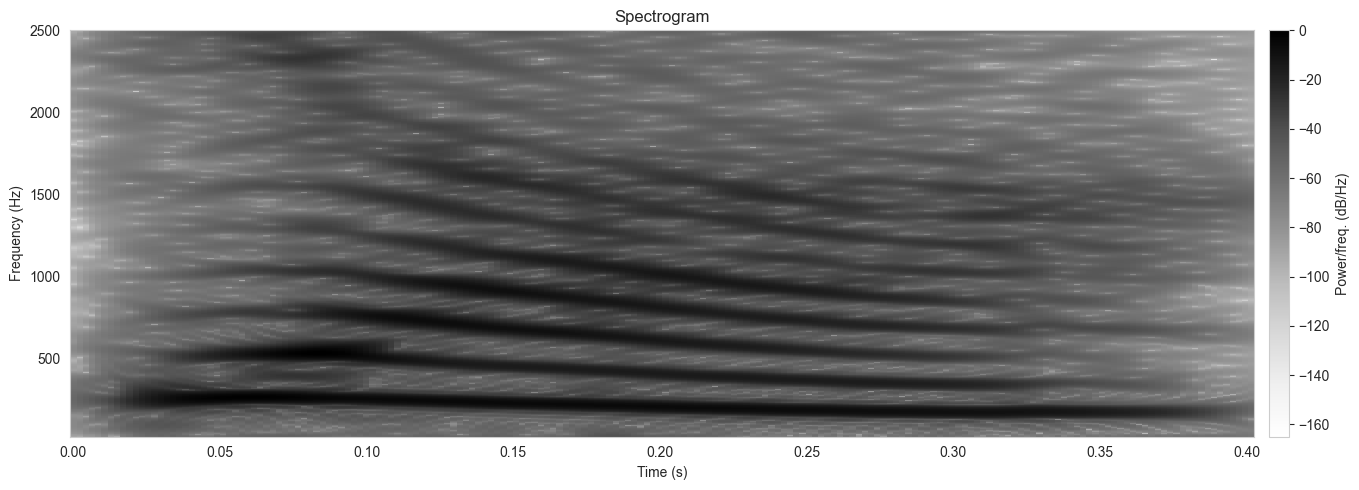

In [ ]:
# Compute and plot spectrogram
M = 2048  # Length of each segment
poverlap = 0.95  # Percentage of overlap
noverlap = int(np.ceil((M - (M % 2))*poverlap))

freq, time, STFT = stft(xi, fs, window='hann', nperseg=M,
                        noverlap=noverlap, nfft=nfft)

STFTdB = 20*np.log10(np.abs(STFT))
STFTdB = STFTdB - np.max(STFTdB)

fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(time, freq, STFTdB, cmap='Greys')
ax.set_ylim((20, 2500))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Spectrogram')

cb = plt.colorbar(im, pad=0.01)
cb.set_label('Power/freq. (dB/Hz)')

plt.tight_layout()
plt.show()

## Wavelet Representation

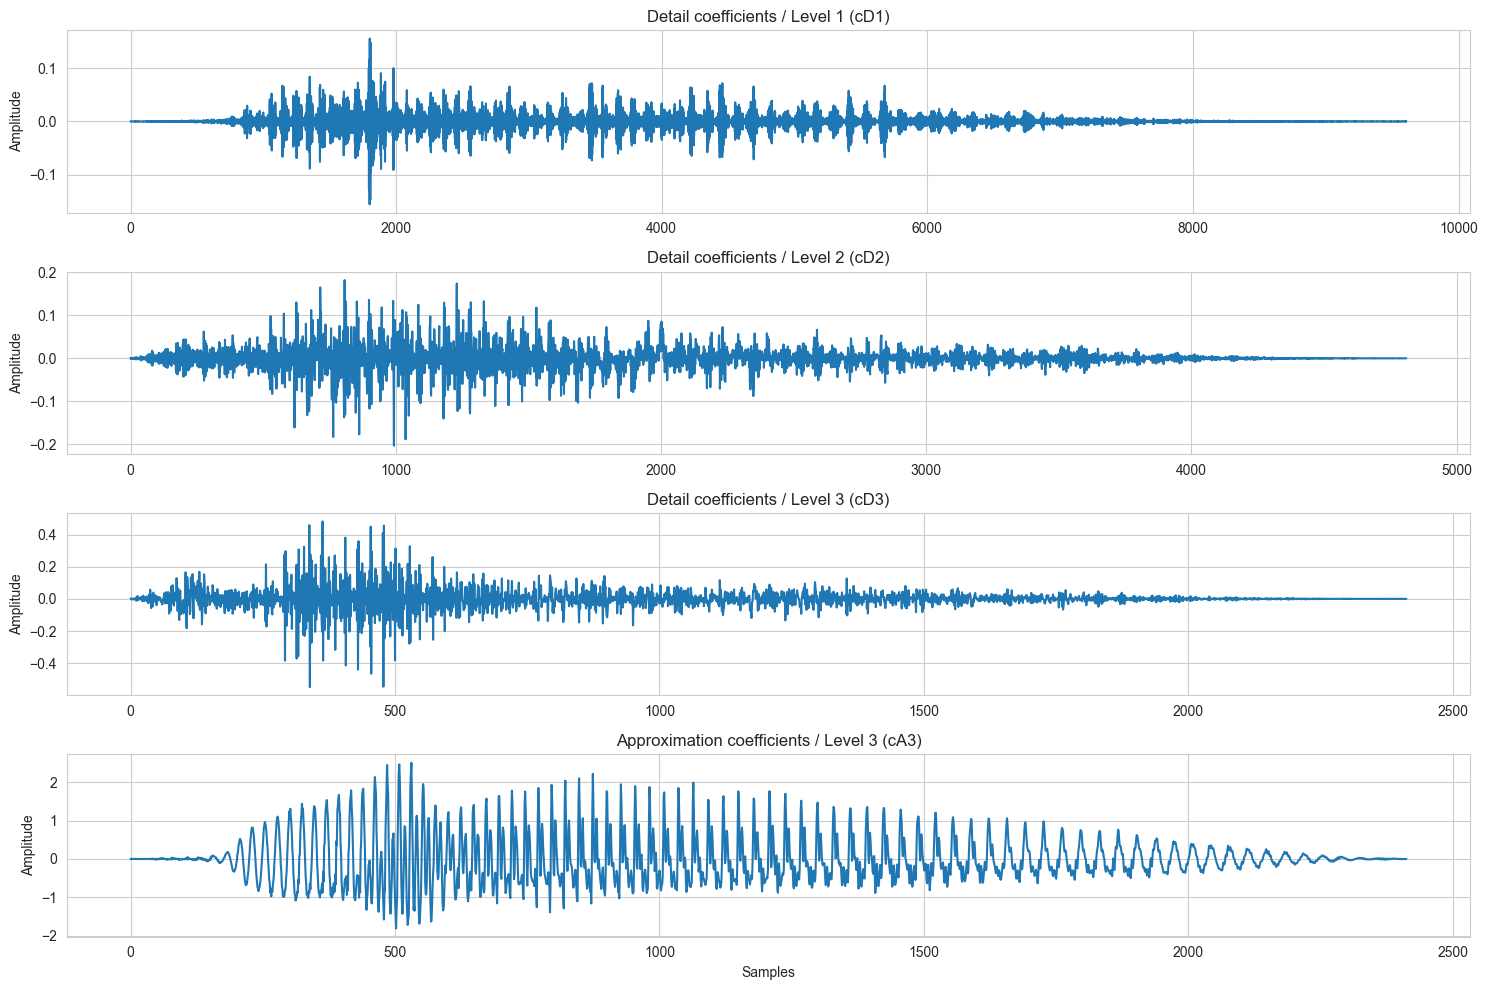

In [18]:
# Compute and plot wavelet coefficients
coeffs = wavedec(xi, 'db8', level=3)
cA3, cD3, cD2, cD1 = coeffs

fig, ax = plt.subplots(4, 1, figsize=(15, 10))
ax[0].plot(cD1)
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Detail coefficients / Level 1 (cD1)')
ax[1].plot(cD2)
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Detail coefficients / Level 2 (cD2)')
ax[2].plot(cD3)
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Detail coefficients / Level 3 (cD3)')
ax[3].plot(cA3)
ax[3].set_xlabel('Samples')
ax[3].set_ylabel('Amplitude')
ax[3].set_title('Approximation coefficients / Level 3 (cA3)')

plt.tight_layout()
plt.show()

## References & Further Reading
- [Audio signal](https://en.wikipedia.org/wiki/Audio_signal)
- [Digital audio](https://en.wikipedia.org/wiki/Digital_audio)
- [Waveform](https://en.wikipedia.org/wiki/Waveform)
- [Discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
- [Fast Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform)
- [Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)
- [Spectrogram](https://en.wikipedia.org/wiki/Spectrogram)
- [Discrete wavelet transform](https://en.wikipedia.org/wiki/Discrete_wavelet_transform)